In [5]:
import numpy as np
import matplotlib.pyplot as plt
import nnpy.Izhtools as it
import nnpy.visu_tools as visu

## two cell interaction  
Test, exc-exc cell

In [15]:
color_codes = ['#C62828', '#1565C0']

def draw_spk(**kwargs):
    for i in range(2):
        for t in obj2.t_spks[i]:
            plt.plot([t, t], yl, c=color_codes[i], **kwargs)

In [16]:
obj2 = it.Reader("../data/two_cell_ntk")
obj2.read_uv()
obj2.read_ic()
obj2.read_r()
obj2.read_tspk()

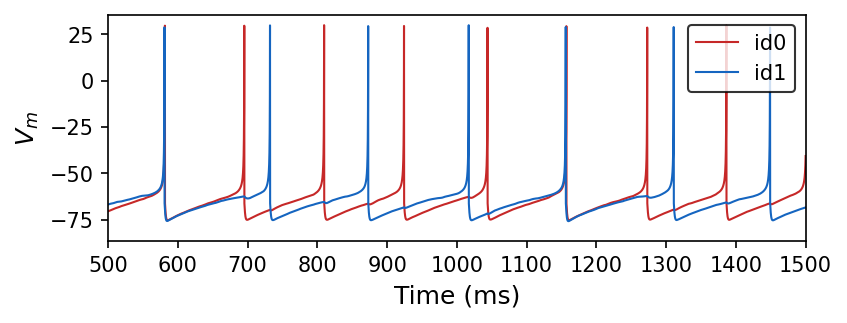

In [17]:
plt.figure(dpi=150, figsize=(6, 2))
for i in range(2):
    plt.plot(obj2.ts, obj2.vs[:, i], lw=1, c=color_codes[i], label='id%d'%(i))
plt.legend(fontsize=10, edgecolor='k')
plt.xlim([500, 1500])
plt.xticks(np.arange(500, 1600, 100))
plt.xlabel(r"Time (ms)", fontsize=12)
plt.ylabel(r"$V_{m}$", fontsize=12)
plt.show()

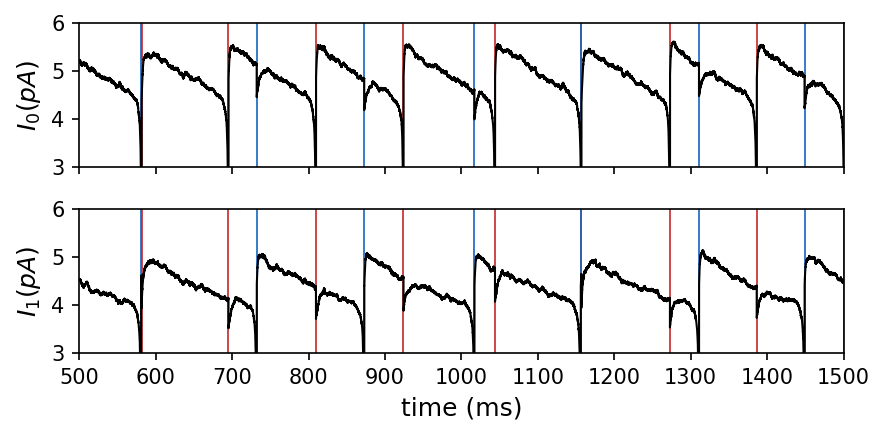

In [187]:
xl = [500, 1500]
yl = [3, 6]

plt.figure(dpi=150, figsize=(6, 3))
for n in range(2):
    plt.subplot(2,1,n+1)
    
    draw_spk(lw=0.8)

    plt.plot(obj2.ts, obj2.ics[:, n], lw=1, c='k')
    plt.xlim(xl)
    plt.ylim(yl)
    
    if n == 0:
        plt.xticks(np.arange(500, 1600, 100), labels=[])
    else:
        plt.xticks(np.arange(500, 1600, 100))
    plt.ylabel(r"$I_{%d} (pA)$"%(n), fontsize=12)
        
plt.xlabel("time (ms)", fontsize=12)
        
plt.tight_layout()
plt.show()

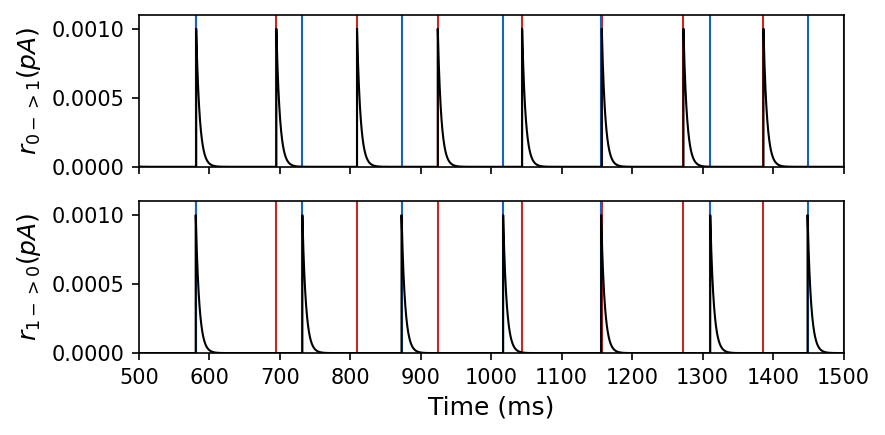

In [239]:
xl = [500, 1500]
yl = [0, 0.0011]

plt.figure(dpi=150, figsize=(6, 3))
for n in range(2):
    plt.subplot(2,1,n+1)
    
    draw_spk(lw=1)
    plt.plot(obj2.ts, obj2.rs[:, n], lw=1, c='k')
    plt.xlim(xl)
    plt.ylim(yl)
    
    if n == 0:
        plt.xticks(np.arange(500, 1600, 100), labels=[])
    else:
        plt.xticks(np.arange(500, 1600, 100))
    plt.ylabel(r"$r_{%d->%d} (pA)$"%(n, 1-n), fontsize=12)
    
    yt = plt.gca().get_yticks()
#     plt.yticks(yt, ['%.2e'%(x) for x in yt])
        
plt.xlabel("Time (ms)", fontsize=12)
        
plt.tight_layout()
plt.show()

## Multiple cell network

In [228]:
obj_ntk = it.Reader("../data/single_ntk")
obj_ntk.read_uv()
obj_ntk.read_ic()
obj_ntk.read_tspk()

In [229]:
vm = np.average(obj_ntk.vs[:, np.array(obj_ntk.cell_types)==0], 1)

In [230]:
def get_xnorm(x, x_avg, x_amp):
    y = (x-min(x)) / (max(x) - min(x)) * 2 - 1
    return y * x_amp + x_avg

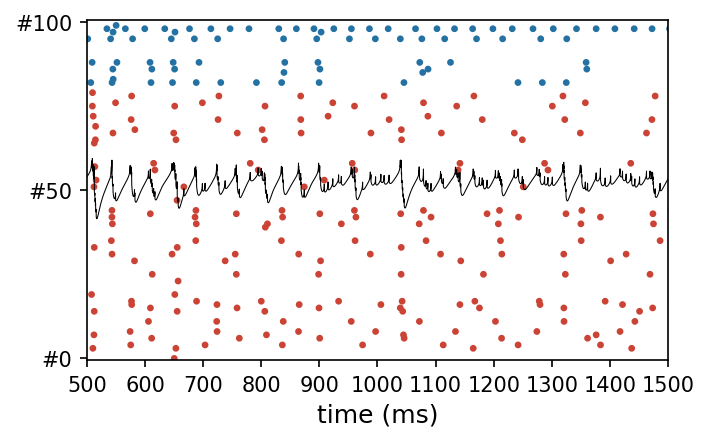

In [233]:
plt.figure(dpi=150, figsize=(5,3))

idt = obj_ntk.ts > 200
plt.plot(obj_ntk.ts[idt], get_xnorm(vm[idt], 50, 10), 'k', lw=0.5, alpha=1)

visu.draw_raster_plot(obj_ntk.t_spks, cell_types=obj_ntk.cell_types, s=5)
plt.xlim([500, 1500])
plt.ylim([-0.5, obj_ntk.N+0.5])
plt.xticks(np.arange(500, 1600, 100))
plt.show()

In [234]:
def show_itv(t_spks, cell_types, color_codes=None, labels=None, edges=None):
    frs = []
    frs_ctp = []
    for n, t_spk in enumerate(t_spks):
        dt = t_spk[1:] - t_spk[:-1]
        frs.extend(1000/dt)
        for i in range(len(dt)):
            frs_ctp.append(cell_types[n])
            
    if edges is None:
        edges = np.linspace(min(frs), max(frs), 21)
    
    for n in np.unique(frs_ctp):
        tmp_frs = [f for f, tp in zip(frs, frs_ctp) if tp == n]
        
        kwargs = {}
        if color_codes is not None:
            kwargs['color'] = color_codes[n]
        if labels is not None:
            kwargs['label'] = labels[n]
        else:
            kwargs['label'] = 'type%d'%(n)
        
        plt.hist(tmp_frs, edges, edgecolor='k', **kwargs)
    
    return frs, frs_ctp

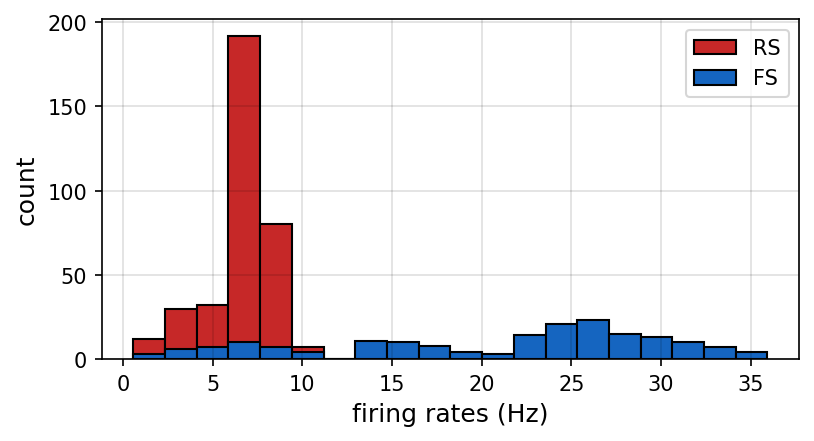

In [235]:
plt.figure(dpi=150, figsize=(6, 3))
frs, ctp = show_itv(obj_ntk.t_spks, obj_ntk.cell_types, color_codes=color_codes, labels=['RS', 'FS'])

plt.legend(fontsize=10)
plt.xlabel("firing rates (Hz)", fontsize=12)
plt.ylabel("count", fontsize=12)
plt.grid(True, lw=0.1, c='k')
plt.show()

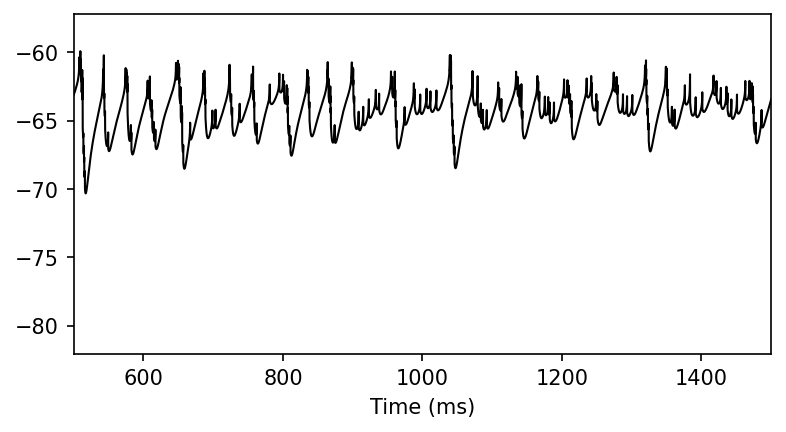

In [236]:
plt.figure(dpi=150, figsize=(6, 3))
plt.plot(obj_ntk.ts, vm, 'k', lw=1)
plt.xlabel("Time (ms)")
plt.xlim([500, 1500])
plt.show()

In [237]:
vm_new = vm[obj_ntk.ts > 500]

N = len(vm_new)
dt = 0.005/1000
# T = len(vm_new)/1000 * 0.005

freq = np.linspace(0, 1/(2*dt), N//2)
yf = np.fft.fft(vm_new)
yf = 2/N * np.abs(yf[:N//2])

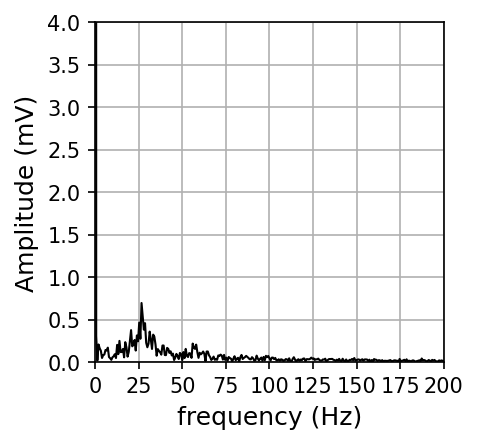

In [238]:
plt.figure(dpi=150, figsize=(3, 3))
plt.plot(freq, yf, 'k', lw=1)
plt.xlabel("frequency (Hz)", fontsize=12)
plt.ylabel("Amplitude (mV)", fontsize=12)
plt.xticks(np.arange(0, 210, 25))
plt.xlim([0, 200])
plt.ylim([0, 4])
plt.grid(True)
plt.show()